## Train a convnet on the Fashion MNIST dataset

Image classification task.

In [0]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import keras
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout,Flatten
from keras.layers import BatchNormalization
from keras.layers import Conv2D, MaxPooling2D
from keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorboardcolab import TensorBoardColab, TensorBoardColabCallback

Using TensorFlow backend.


In [3]:
#Load the dataset
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 1s 0us/step


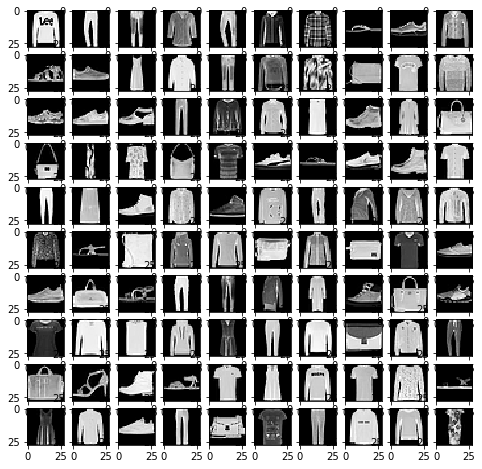

In [4]:
#Visualize a few images
w=10
h=10
fig=plt.figure(figsize=(8, 8))
columns = 10
rows = 10
for i in range(1, columns*rows +1):
    img = x_test[i]
    fig.add_subplot(rows, columns, i)
    plt.imshow(img, cmap='gray')
plt.show()

In [5]:
print ('Train size:', x_train.shape[0])

Train size: 60000


In [6]:
print ('Test size:', x_test.shape[0])

Test size: 10000


In [7]:
print ('Train dimensions:', x_train.shape)

Train dimensions: (60000, 28, 28)


In [8]:
print ('Test dimensions:', x_test.shape)

Test dimensions: (10000, 28, 28)


In [0]:
# input image dimensions
img_rows, img_cols = 28, 28

#Keras expects data to be in the format (N_E.N_H,N_W,N_C)
#N_E = Number of Examples, N_H = height, N_W = Width, N_C = Number of Channels.
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)

In [0]:
batch_size = 128
num_classes = 10
epochs = 12

In [0]:
y_train = keras.utils.to_categorical(y_train, num_classes)   # Converting the target into categorical which is stored as numeric
y_test = keras.utils.to_categorical(y_test, num_classes)     # Keras converst these into 1-hot coded vectors as these are lables


In [12]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

#Normalizing the input
x_train /= 255.0
x_test /= 255.0
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [13]:
print(y_train[0])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [0]:
#x_train = x_train.reshape(60000, 28,28,1)    # 784 = 28 X 28 the size of each image. There are 60000 images for training
#x_test = x_test.reshape(10000, 28,28,1) 

In [15]:
x_train.shape

(60000, 28, 28, 1)

In [16]:
x_test.shape

(10000, 28, 28, 1)

In [17]:
#Initialize the model
model = Sequential()

#Add a Convolutional Layer with 32 filters of size 3X3 and activation function as 'ReLU' 
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))


### Build a model 



In [18]:
#Add a Convolutional Layer with 64 filters of size 3X3 and activation function as 'ReLU' 
model.add(Conv2D(64, (3, 3), activation='relu'))

#Add a MaxPooling Layer of size 2X2 
model.add(MaxPooling2D(pool_size=(2, 2)))

#Apply Dropout with 0.25 probability 
model.add(Dropout(0.25))

#Flatten the layer
model.add(Flatten())

#Add Fully Connected Layer with 128 units and activation function as 'ReLU'
model.add(Dense(128, activation='relu'))

#Apply Dropout with 0.5 probability 
model.add(Dropout(0.5))

#Add Fully Connected Layer with 10 units and activation function as 'softmax'
model.add(Dense(num_classes, activation='softmax'))




Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [0]:
from keras.preprocessing.image import ImageDataGenerator

# This will do preprocessing and realtime data augmentation:
datagen = ImageDataGenerator()  # randomly flip images

# Prepare the generator
datagen.fit(x_train)

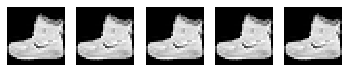

In [20]:
from matplotlib import pyplot as plt
gen = datagen.flow(x_train[0:1], batch_size=1)
for i in range(1, 6):
    plt.subplot(1,5,i)
    plt.axis("off")
    plt.imshow(gen.next().squeeze(), cmap='gray')
    plt.plot()
plt.show()

In [0]:
#Initializing Early stopping and Model chekpoint callbacks 

In [0]:
#Adding Early stopping callback to the fit function is going to stop the training,
#if the val_loss is not going to change even '0.001' for more than 10 continous epochs

early_stopping = EarlyStopping(monitor='val_loss', min_delta=0.001, patience=10)

#Adding Model Checkpoint callback to the fit function is going to save the weights whenever val_loss achieves a new low value. 
#Hence saving the best weights occurred during training

model_checkpoint =  ModelCheckpoint('fashionmnist_cnn_checkpoint_{epoch:02d}_loss{val_loss:.4f}.h5',
                                                           monitor='val_loss',
                                                           verbose=1,
                                                           save_best_only=True,
                                                           save_weights_only=True,
                                                           mode='auto',
                                                           period=1)

In [23]:
from keras.optimizers import Adam
from keras.losses import categorical_crossentropy

#To use adam optimizer for learning weights with learning rate = 0.001
optimizer = Adam(lr=0.001)
#Set the loss function and optimizer for the model training
model.compile(loss=categorical_crossentropy,
              optimizer=optimizer,
              metrics=['accuracy'])

In [24]:
#Tensorboard callback is going to be added to model.fit function to draw graphs of loss values after every epoch
tbc = TensorBoardColab()

Wait for 8 seconds...
TensorBoard link:
https://5a914ec1.ngrok.io


In [25]:
model.fit_generator(datagen.flow(x_train, y_train,batch_size=32),
                    samples_per_epoch=x_train.shape[0],
                    nb_epoch=10,
                    validation_data=(x_test, y_test), callbacks= [TensorBoardColabCallback(tbc),early_stopping,model_checkpoint])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where










Epoch 1/10
1875/1875 [==============================] - 20s 11ms/step - loss: 0.4812 - acc: 0.8296 - val_loss: 0.3081 - val_acc: 0.8856


Epoch 00001: val_loss improved from inf to 0.30812, saving model to fashionmnist_cnn_checkpoint_01_loss0.3081.h5
Epoch 2/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.3250 - acc: 0.8826 - val_loss: 0.2654 - val_acc: 0.9016

Epoch 00002: val_loss improved from 0.30812 to 0.26543, saving model to fashionmnist_cnn_checkpoint_02_loss0.2654.h5
Epoch 3/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.2792 - acc: 0.8986 - val_loss: 0.2514 - val_acc: 0.9113

Epoch 00003: val_loss improved from 0.26543 to 0.25141, saving model to fashionmnist_cnn_checkpoint_03_loss0.2514.h5
Epoch 4/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.2426 - acc: 0.9099 - val_loss: 0.2366 - val_acc: 0.9148

Epo

###  Report the final train and validation accuracy

In [26]:
#Testing the model on test set
score = model.evaluate(x_train, y_train)
print('Train loss:', score[0])
print('Train accuracy:', score[1])

60000/60000 [==============================] - 3s 58us/step
Train loss: 0.08689678876424829
Train accuracy: 0.9670166666666666


In [27]:
#Testing the model on test set
score1 = model.evaluate(x_test, y_test)
print('Test loss:', score1[0])
print('Test accuracy:', score1[1])

10000/10000 [==============================] - 1s 60us/step
Test loss: 0.23871828595399858
Test accuracy: 0.9239


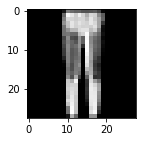

1


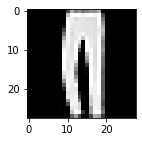

1


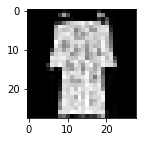

3


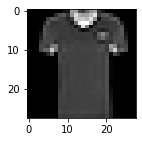

0


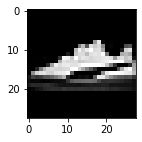

7


In [28]:
import numpy as np

plt.figure(figsize=(2,2))
plt.imshow(x_test[3].reshape(28,28),cmap="gray")
plt.show()
print(np.argmax(model.predict(x_test[3].reshape(1,28,28,1))))


plt.figure(figsize=(2,2))
plt.imshow(x_test[2].reshape(28,28),cmap="gray")
plt.show()
print(np.argmax(model.predict(x_test[2].reshape(1,28,28,1))))


plt.figure(figsize=(2,2))
plt.imshow(x_test[33].reshape(28,28),cmap="gray")
plt.show()
print(np.argmax(model.predict(x_test[33].reshape(1,28,28,1))))


plt.figure(figsize=(2,2))
plt.imshow(x_test[59].reshape(28,28),cmap="gray")
plt.show()
print(np.argmax(model.predict(x_test[59].reshape(1,28,28,1))))


plt.figure(figsize=(2,2))
plt.imshow(x_test[36].reshape(28,28),cmap="gray")
plt.show()
print(np.argmax(model.predict(x_test[36].reshape(1,28,28,1))))

In [0]:
#Set the path where you want to store the model and weights. 
model.save('./cnn_Fashionmnist.h5')
model.save_weights('./cnn_Fashionmnist_weights.h5')

## **DATA AUGMENTATION ON CIFAR10 DATASET**

In [0]:
from matplotlib import pyplot
from keras.datasets import cifar10

In [31]:
# load dataset
(trainX, trainy), (testX, testy) = cifar10.load_data()

170500096/170498071 [==============================] - 4s 0us/step


In [32]:
testX.shape

(10000, 32, 32, 3)

In [33]:
trainX.shape

(50000, 32, 32, 3)

Train: X=(50000, 32, 32, 3), y=(50000, 1)
Test: X=(10000, 32, 32, 3), y=(10000, 1)


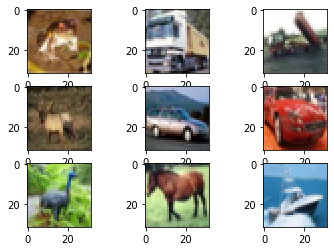

In [34]:
# summarize loaded dataset
print('Train: X=%s, y=%s' % (trainX.shape, trainy.shape))
print('Test: X=%s, y=%s' % (testX.shape, testy.shape))
# plot first few images
for i in range(9):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# plot raw pixel data
	pyplot.imshow(trainX[i])
# show the figure
pyplot.show()

#Image Rotation,shifting image horizontally and vertically with random flip horizontally.

In [0]:
# reshape to be [samples][width][height][channels]
trainX = trainX.reshape((trainX.shape[0], 32, 32, 3))
testX = testX.reshape((testX.shape[0], 32, 32, 3))
# convert from int to float
#trainX = trainX.astype('float32')
#testX = testX.astype('float32')

In [0]:
from keras.preprocessing.image import ImageDataGenerator
#image rotation,shifting image horizontally and vertically with random flip horizontally.**

# This will do preprocessing and realtime data augmentation:
datagen2 = ImageDataGenerator(
    zca_whitening= True,  # apply ZCA whitening
    rotation_range=50,  # randomly rotate images in the range (degrees, 0 to 180)
    width_shift_range=0.2,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.2,  # randomly shift images vertically (fraction of total height)
    horizontal_flip= True,  # randomly flip images
    vertical_flip=False)  # randomly flip images


[]

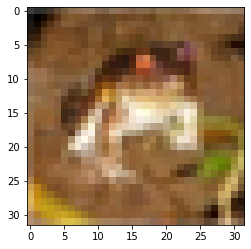

In [37]:
plt.imshow(trainX[0], cmap='gray')
plt.plot()

In [0]:
# Prepare and fit the generator
datagen2.fit(trainX)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


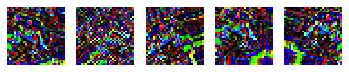

In [39]:
%matplotlib inline
gen = datagen2.flow(trainX[:1], batch_size=1)
for i in range(1, 6):
    plt.subplot(1,5,i)
    plt.axis("off")
    plt.imshow(gen.next().squeeze(), cmap='gray')
    plt.plot()